# <font face="Verdana" size=6 color='#6495ED'> AN√ÅLISE ESTAT√çSTICA DE DADOS

<font face="Verdana" size=3 color='#40E0D0'> Profs. Larissa Driemeier e Arturo Forner-Cordero

<center><img src='https://drive.google.com/uc?export=view&id=1CJsooGWXxTqWw0VeGAoroNb509nYKiRK' width="800"></center>

Este notebook faz parte da aula [08](https://alunoweb.net/moodle/pluginfile.php/141064/mod_resource/content/3/EST_08_Y2024.pdf) do curso IAD-001.



In [2]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.core.function_base import linspace
from numpy.random import binomial
from numpy.random import multinomial
from scipy.stats import bernoulli, binom, geom, poisson
from scipy.stats import multinomial as multinom
colors=['darkblue','darkred','darkolivegreen','darkmagenta']
# Magic function to make matplotlib inline; other style specs must come AFTER
%matplotlib inline

# Teorema de Bayes

Pode parecer que o teorema de Bayes √© algo m√°gico, quase m√≠stico: um pouco de matem√°tica que, de certa forma, avalia as informa√ß√µes dispon√≠veis e fornece as chances de uma determinada situa√ß√£o...

Mas esse m√≠stico tem mais a ver com sua reputa√ß√£o e aplica√ß√µes avan√ßadas do que o n√∫cleo real dele - deriv√°-lo √©  notavelmente simples e direto. Fizemos isso em na aula anterior e n√£o custa nada repetirmos aqui ...

## Lei da Probabilidade Total

Por defini√ß√£o, a probabilidade total de todos os $n$ resultados (eventos) poss√≠veis para uma vari√°vel (espa√ßo amostral) $A$ vale:

$$P(A) = \sum_n P(A_n) = 1$$


A lei da probabilidade total leva isso adiante. Considerando-se dois espa√ßos amostrais ($A$ e $B$), a lei da probabilidade total e relaciona suas probabilidades marginais (suas probabilidades consideradas independentemente, sem refer√™ncia uma √† outra) com suas probabilidades condicionais (suas probabilidades consideradas em conjunto). Uma probabilidade marginal √© simplesmente, p. ex., $P(A)$, enquanto uma probabilidade condicional √© $P(B|A)$, que l√™-se "probabilidade de $B$ *dado que* $A$ ocorreu".

A lei da probabilidade total diz que  a probabilidade total de $A$ √© igual √† soma da probabilidade condicional de $A$ em qualquer evento $B_n$ vezes a probabilidade desse evento $B_n$, para todos os eventos poss√≠veis em $B$ .

$$P(A) = \sum_n P(A | B_n) P(B_n)$$

##  Lei da Probabilidade Condicionada

Para determinarmos a probabilidade de um evento condicionado √† ocorr√™ncia de outro, devemos apelar voltar √† teoria dos conjuntos e pensar na interse√ß√£o dos conjuntos:

$$P(B|A) = \frac{P(B \cap A)}{P(A)}$$

Multiplica-se os dois lados da equa√ß√£o acima por $P(A)$, de modo que $P(B|A)P(A) = P(B \cap A)$. Pode-se repetir o racioc√≠nio para $P(A|B)$ e, portanto,  concluir que $P(A|B)P(B) = P(A \cap B) = P(B \cap A)$


## Teorema

A regra de Bayes serve para calcular a probabilidade condicional de $H$: $p(H | E)$ a partir da probabilidade condicional de ${p(E|H)}$, com $H$ sendo a hip√≥tese que estamos testando e $E$ sendo o evento que j√° ocorreu. Ou seja, o teorema de Bayes pode ser escrito como:
$$
\color{firebrick}{p(H|E)=p(H) \frac{p(E|H)}{p(E)}}
$$

Isso pode ser muito √∫til em caso de incerteza do evento, por exemplo, se eu perguntar: voc√™ acha que eu vou a p√© para o meu trabalho? Inicialmente, voc√™ pode supor algo como uma probabilidade de $40%$ de eu ir a p√© para o meu local de trabalho. No entanto, se eu lhe der informa√ß√µes adicionais, como minha casa fica a dez minutos a p√© do meu local de trabalho, a probabilidade de eu realmente ir a p√© se torna alta. Se, ao contr√°rio, eu disser que minha casa fica a mais de 6 km do meu escrit√≥rio, a probabilidade de eu ir a p√© para l√° se torna pequena. Esta √© a probabilidade condicional, a probabilidade de eu ir a p√© para o meu local de trabalho, dado que meu local de trabalho fica a dez minutos a p√© da minha casa.

p(H) a priori: reflete nossa cren√ßa, o que sabemos sobre o valor do par√¢metro de interesse antes de dar uma olhada nos dados. Em nosso exemplo anterior, este √© nosso palpite inicial de 40% de chances de eu ir a p√© para o meu local de trabalho.

p(E|H) verossimilhan√ßa: probabilidade de observar a evid√™ncia quando nossa hip√≥tese H est√° correta. Em outras palavras: qual √© a probabilidade de observar nossos dados, dada nossa cren√ßa inicial (ou hip√≥tese)? Em nosso exemplo, a evid√™ncia √© a dist√¢ncia entre minha casa e o escrit√≥rio. Qual √© a probabilidade de meu local de trabalho estar a apenas dez minutos a p√© da minha casa, se eu for a p√© para o meu local de trabalho?

p(H|E) a posteriori: este √© o resultado da an√°lise bayesiana: cont√©m todo o nosso conhecimento sobre um determinado problema, juntamente com nosso modelo e nossos dados. Em nosso exemplo, qual √© a probabilidade de eu ir a p√© para o meu local de trabalho, dado que meu local de trabalho est√° a dez minutos a p√© da minha casa?

p(E) evid√™ncia: probabilidade marginal de observar nossos dados em qualquer situa√ß√£o poss√≠vel, independentemente de nossa hip√≥tese. √â conhecido como fator de normaliza√ß√£o, pois garante que a probabilidade a posteriori esteja entre $0-1$.

<img src='https://drive.google.com/uc?export=view&id=12sA6tTqj-4utAM1rrIg3BjphI3knO9Ob' width="700">

As $p(E)$ is a normalization factor,
$$
p(H|E) \propto p(E|H) * p(H)
$$

## Exemplo do Baf√¥metro

Voc√™ sabe que $8\%$ dos testes de baf√¥metro s√£o positivos. Suponha $100\%$ de verdadeiros positivos (detectar __todos__ os motoristas b√™bados que fizerem o teste).

Digamos que a taxa de motoristas embriagados (e, portanto, nossa cren√ßa inicial) √© de $1\%$.

![Bafometro](https://drive.google.com/uc?export=view&id=1IT40Yyn5y0axN7h7OxbsOJL1D4-pRNfd)
$$
\begin{aligned}
P(P | E) &= 1.\\
P(E) &= 0.01\\
P(nE) &= 1.- P(E)=0.99\\
P(P) &= 0.08\\
P(nP) &= 1.0 - P(P)=0.92\\
\end{aligned}
$$

Qual √© a probabilidade de algu√©m realmente estar embriagado se o teste der positivo?
$$
\begin{aligned}
P(E| P) &= P(E)\frac{P(P | E)}{P(P)} \\
&= \frac{1 \times 0.01}{0.08} \\
&= 0.125 = 12.5\%
\end{aligned}
$$
onde $E$ refere-se a Embriagado e $P$ refere-se a Positivo.

In [3]:
p_P_dado_E = 1.
p_E = 0.01
p_nE = 1.- p_E
p_P = 0.08
p_nP = 1.0 - p_P
print('Probabilidade de estar embriagado, dado que deu positivo √©: {:5.2%}'.format(p_P_dado_E*p_E/(p_P)))

Probabilidade de estar embriagado, dado que deu positivo √©: 12.50%


Voc√™ pode pensar que exatos $100\%$ de verdadeiros positivos (detectar algu√©m que est√° b√™bado) √© muito bom, mas e se ele tamb√©m tiver falso positivo (indicando que algu√©m est√° b√™bado quando n√£o est√°)?

A probabilidade de falsos positivos √©,
$$
\begin{aligned}
P(P) &= P(P|E) P(E)+P(P|nE)P(nE) \\
P(P|nE) &= \frac{P(P) - P(P|E)P(E)}{P(nE)} \\
&= \frac{0.08 - 1 \times 0.01}{0.99} \\
&= 0.0707 = 7.07\%
\end{aligned}
$$

O Teorema de Bayes, portanto,nos ajuda a quantificar o ceticismo e nos permite ter um entendimento mais claro do problema. Originalmente, pens√°vamos que a probabilidade de o motorista estar embriagado era bastante alta, mas agora vemos que √© apenas cerca de $12.5\%$.

Deve-se ressaltar que existem alguns pontos importantes, e o principal, nesse caso, √© a aleatoriedade do teste. Isto √©, o motorista foi parado por causa da maneira que estava dirigindo, decidiram fazer o baf√¥metro pela atitude do motorista, a √°rea da blitz √© uma √°rea pr√≥xima a bares?

Veja mais detalhes sobre o teorema de Bayes e o exemplo usado aqui em [testes de baf√¥metro](https://www.bayestheorem.net/breathalyzer-example/).

In [4]:
print('Probabilidade de falso positivo √©: {:5.2%}'.format((p_P-p_P_dado_E*p_E)/p_nE))

Probabilidade de falso positivo √©: 7.07%


#Distribui√ß√µes de probabilidade para vari√°veis discretas

Antes de come√ßarmos a falar sobre distribui√ß√µes, vamos recordar o que s√£o distribui√ß√µes de probabilidade.

A **distribui√ß√£o de probabilidades**, ou **modelo probabil√≠stico**, indica, para uma vari√°vel aleat√≥ria, **quais s√£o os resultados que podem ocorrer** e **qual √© a probabilidade de cada resultado acontecer**.

Uma fun√ß√£o de massa de probabilidade (PMF, do ingl√™s, *probability mass function*), $P(x)$, descreve a probabilidade de uma vari√°vel discreta obter $X$ o valor $x$. A vari√°vel $x$ assume $n$ valores discretos, de modo que,
\begin{align}
\sum_{x=x_1}^{x_n} P(x) = 1.
\end{align}

Uma fun√ß√£o de distribui√ß√£o acumulativa (CDF, do ingl√™s, *cumulative distribution function*), denominada $F(X)$, √© definida como a probabilidade de que uma vari√°vel $X$ assuma valores menores ou iguais a $x$.

Em geral, para uma distribui√ß√£o discreta

\begin{align}
F(x) = \sum_{x_i=x_1}^x P(x_i),
\end{align}


## Valor esperado e vari√¢ncia

O valor esperado de uma vari√°vel aleat√≥ria discreta pode ser obtido como o somat√≥rio da multiplica√ß√£o de cada valor $x_i$ por sua probabilidade de ocorr√™ncia, definida como $P(x_i)$

\begin{align}
E[X] = \sum_{i=1}^n x_i P(x_i),
\end{align}

A vari√¢ncia e o desvio padr√£o s√£o medidas de quanto os resultados probabil√≠sticos se desviam do valor esperado. Assumindo que o valor esperado $E[X]$ da vari√°vel foi calculado, a vari√¢ncia de uma vari√°vel aleat√≥ria $X$ √© igual ao valor esperado do quadrado de $X$ menos o valor esperado de $X$ ao quadrado,
\begin{align}
s_x^2 &= \textrm{Var}(X)=E[X^2]-(E[X])^2.
\end{align}

O desvio padr√£o de uma vari√°vel aleat√≥ria, $s_x$, √© a raiz quadrada da vari√¢ncia.

### Porque estamos falando de *valor esperado* e n√£o m√©dia?


O Valor Esperado √© usado no caso de Vari√°veis Aleat√≥rias (ou em outras palavras, *Distribui√ß√µes de Probabilidade*).

Sabe-se que a *m√©dia* √© definida como a soma de todos os elementos dividida pela soma de suas frequ√™ncias. Mas, para o caso da distribui√ß√£o de probabilidade, n√£o podemos descrever uma vari√°vel aleat√≥ria em termos de sua frequ√™ncia de antem√£o, portanto, usamos a probabilidade. Conceitualmente, a probabilidade de um elemento √© a frequ√™ncia de um evento dividida pelo tamanho do espa√ßo amostral. Assim, a m√©dia no caso de vari√°vel aleat√≥ria pode ser dada pela soma das multiplica√ß√µes de cada evento pela respectiva probabilidade. Nesse caso, $P(x_i)*x_i$ √© conceitualmente a frequ√™ncia de $x_i$ dividida pela frequ√™ncia total.

A m√©dia, por outro lado, √© usada no caso em que temos o conhecimento das frequ√™ncias dos elementos individuais e da contagem total dos elementos, por exemplo, no caso de um conjunto de dados ou amostra conhecido. Podemos simplesmente usar a defini√ß√£o fundamental de m√©dia para calcul√°-la.

Observe que temos, em geral,

\begin{equation}
\bar{X}=\frac{\sum_{k=1}^n x_k}{n}\neq E(X).
\end{equation}


Mas, a m√©dia dos experimentos tende ao valor esperado quando o n√∫mero de experimentos tende ao infinito. Esse comportamento tamb√©m √© chamado de *lei dos grandes n√∫meros*, mas isso n√£o pe assunto para n√≥s...

Veja o exemplo: seja $X$ o resultado de um lan√ßamento de um dado de seis faces n√£o viciado. Os valores poss√≠veis para $X$ s√£o $1, 2, 3, 4, 5$ e $6$, cada um com probabilidade de ocorr√™ncia de $1/6$. O valor esperado de $X$ √© ent√£o dado por

$$
E(X) = 1\times\frac{1}{6}+2\times\frac{1}{6}+3\times\frac{1}{6}+4\times\frac{1}{6}+5\times\frac{1}{6}+6\times\frac{1}{6} = \frac{21}{6} = 3.5
$$

Suponha que em uma sequ√™ncia de dez jogadas do dado, se os resultados forem $5, 2, 6, 2, 2, 1, 2, 3, 6, 1$, ent√£o a m√©dia (m√©dia aritm√©tica) dos resultados √© dada por
$$
\bar{X} = \frac{5+2+6+2+2+1+2+3+6+1}{10} = 3.0
$$

Dizemos que o valor m√©dio √© $3.0$, com a dist√¢ncia de $0.5$ do valor esperado de $3.5$. Se jogarmos o dado $n$ vezes, onde $n$ √© muito grande, ent√£o a m√©dia convergir√° para o valor esperado, ou seja, $\bar{X}= E(X)$. Isso ocorre evidentemente porque, quando $n$ √© muito grande, cada valor poss√≠vel de $X $(ou seja, 1 a 6) ocorrer√° com igual probabilidade de $1/6$, transformando a m√©dia no valor esperado.

## Distribui√ß√µes discretas

Apresentaremos PMFs e CDFs para as distribui√ß√µes abaixo:
*   Bernoulli
*   Binomial
*   Multinomial
*   Geom√©trica
*   Poisson

## Amostragem
Dado que conhecemos uma distribui√ß√£o de probabilidade, podemos extrair amostras dela. Isso significa que podemos obter n√∫meros aleatoriamente e a probabilidade de obter um determinado n√∫mero $x$ √© proporcional a PMF ou $P(x)$.

Sugest√£o de [leitura complementar](http://bebi103.caltech.edu.s3-website-us-east-1.amazonaws.com/2016/tutorials/t3b_probability_stories.html#Bernoulli-distribution).



## Distribui√ß√£o Bernoulli

Muitas vezes, tem-se situa√ß√µes onde um experimento tem dois resultados poss√≠veis: sucesso $(x = 1,\text{True})$ ou fracasso $(x = 0,\text{False})$. Repetindo-se o experimento uma √∫nica vez, a distribui√ß√£o de Bernoulli define a probabilidade de obter cada resultado.

A distribui√ß√£o de Bernoulli √© parametrizada por um √∫nico valor, $p$, que define a probabilidade de sucesso.

Fun√ß√£o de massa de probabilidade (PMF) √© dada por,

\begin{align}
P(x;p) = \left\{ \begin{array}{ccc}
1-p & & x = 0 \\[0.5em]
p & & x = 1 \\[0.5em]
0 & & \text{otherwise.}
\end{array}
\right.
\end{align}

Usaremos a fun√ß√£o `bernoulli` (`from scipy.stats`), com uma probabilidade de sucesso de $p=0.3$.

A Fun√ß√£o de Massa de Probabilidade .pmf() (do ingl√™s, Probability Mass Function) encontra a probabilidade de um evento em um ponto espec√≠fico da distribui√ß√£o. A fun√ß√£o √© definida apenas em distribui√ß√µes discretas onde cada evento tem uma probabilidade fixa de ocorrer.

In [5]:
# Vari√°veis de entrada:
# Probabilidade de sucesso de cada experimento, p
p = 0.3
X = bernoulli(p)
prob1 = X.pmf(1)
prob0 = X.pmf(0)
print('A probabilidade de sucesso em 1 evento √© {:.0%} e probabilidade de fracasso √© {:.0%}'.format(prob1,prob0))

A probabilidade de sucesso em 1 evento √© 30% e probabilidade de fracasso √© 70%


O interessante de Bernoulli √© quando usamos para simular dados. Por exemplo, simula-se 10000 experimentos com nossa vari√°vel aleat√≥ria.

Usaremos a fun√ß√£o `bernoulli.rsv` (`from scipy.stats`). `rvs` √© uma abrevia√ß√£o, do ingl√™s, para *Random Variable Sampling*.

Veja que a resposta √© sucesso ou fracasso, para cada uma das 100000 simula√ß√µes do evento:
[0 0 0 ... 0 0 0]
N√∫mero de caras:  29860.0     N√∫mero de coroas:  70140.0
Valores esperados para Distribui√ß√£o de Bernoulli:
Valor esperado=0.300, Vari√¢ncia=0.210
Modelo rand√¥mico de dados com distribui√ß√£o de Bernoulli:
M√©dia=0.299, Vari√¢ncia=0.209


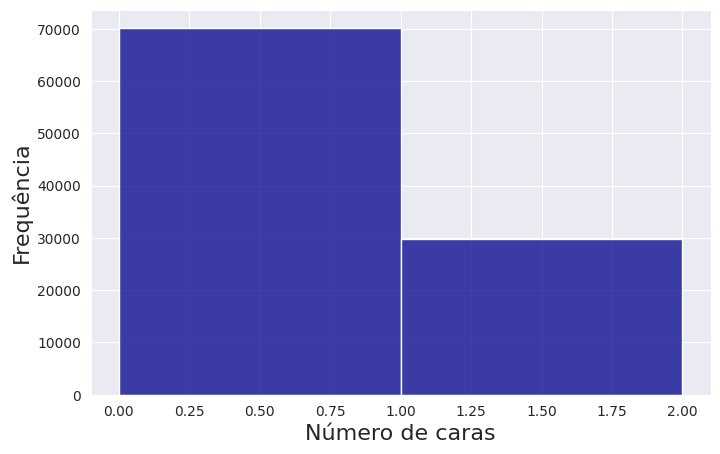

In [11]:
# N√∫mero de repeti√ß√µes do evento
k = 100000
# Probabilidade de sucesso de cada experimento, p
p = 0.3
X = bernoulli(p)
X_samples = X.rvs(size=k) #
print('Veja que a resposta √© sucesso ou fracasso, para cada uma das %d simula√ß√µes do evento:'%(k))
print(X_samples)

heads = [np.sum(X_samples) for i in range(len(X_samples)) if i == 1]
tails = k - heads[0]
print('N√∫mero de caras: ','{:6.1f}'.format(heads[0]), '    N√∫mero de coroas: ', '{:6.1f}'.format(tails))

# Valor esperado e vari√¢ncia
print("Valores esperados para Distribui√ß√£o de Bernoulli:")
print('Valor esperado={:5.3f}, Vari√¢ncia={:5.3f}'.format(p, p*(1-p)))
print("Modelo rand√¥mico de dados com distribui√ß√£o de Bernoulli:")
print('M√©dia={:5.3f}, Vari√¢ncia={:5.3f}'.format(X_samples.mean(), (X_samples.std())**2))

# Plotagem dos resultados
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(8,5))
ax = sns.histplot(X_samples, bins=np.linspace(0,2,3), color=colors[0])
ax.set_xlabel("N√∫mero de caras",fontsize=16)
ax.set_ylabel("Frequ√™ncia",fontsize=16);


Podemos comparar nossa m√©dia calculada do experimento com a m√©dia te√≥rica que acabamos de derivar. Eles s√£o de fato muito pr√≥ximos e se aproximam √† medida que o tamanho da amostra aumenta. Mude o valor (atualmente 10000) e verifique o resultado.

## Distribui√ß√£o binomial


Podemos olhar para uma distribui√ß√£o binomial como um conjunto de experimentos ou tentativas de Bernoulli, nossa compreens√£o de como as propriedades da distribui√ß√£o s√£o derivadas torna-se significativamente mais simples.

As principais condi√ß√µes que precisam ser cumpridas para definir noss distribui√ß√£o binomial:
* Os ensaios s√£o independentes;
* Cada tentativa pode ser classificada como sucesso ou fracasso;
* H√° um n√∫mero fixo de tentativas;
* A probabilidade de sucesso em cada tentativa √© constante.


Realizamos $n$ ensaios de Bernoulli com probabilidade $p$ de sucesso. O n√∫mero de sucessos, $x$, √© um n√∫mero positivo, inteiro, e distribu√≠do binomialmente. Portanto, existem dois par√¢metros: a probabilidade $p$ de sucesso para cada tentativa de Bernoulli e o n√∫mero de ensaios, $n$.

Fun√ß√£o de massa de probabilidade √© dada por,
\begin{align}
P(x;n,p) = \begin{pmatrix}
n \\
x
\end{pmatrix}
p^x (1-p)^{n-x}.
\end{align}
onde
\begin{align}
\begin{pmatrix}
n \\
x
\end{pmatrix}=\frac{n!}{x!(n-x)!}
\end{align}
e
$$
x! = x \times (x-1) \times (x-2) \times \cdots \times 1
$$

Particularmente, $0!=1$.

### Exemplo

Vamos supor que eu jogue uma moeda n√£o viciada 10 vezes. O sucesso √© o n√∫mero de caras. Qual a probabilidade de eu obter $0,1,2,3,4,5,6,7,8,9$ e $10$ sucessos no evento?


In [12]:
# Vari√°veis de entrada:
# N√∫mero de eventos independentes, n
n = 10
# Probabilidade de sucesso de cada experimento, p
p = 0.5

Y = binom(n,p)

Probabilidade de   0 sucesso(s) no evento: 0.10%
Probabilidade de   1 sucesso(s) no evento: 0.98%
Probabilidade de   2 sucesso(s) no evento: 4.39%
Probabilidade de   3 sucesso(s) no evento: 11.72%
Probabilidade de   4 sucesso(s) no evento: 20.51%
Probabilidade de   5 sucesso(s) no evento: 24.61%
Probabilidade de   6 sucesso(s) no evento: 20.51%
Probabilidade de   7 sucesso(s) no evento: 11.72%
Probabilidade de   8 sucesso(s) no evento: 4.39%
Probabilidade de   9 sucesso(s) no evento: 0.98%
Probabilidade de  10 sucesso(s) no evento: 0.10%


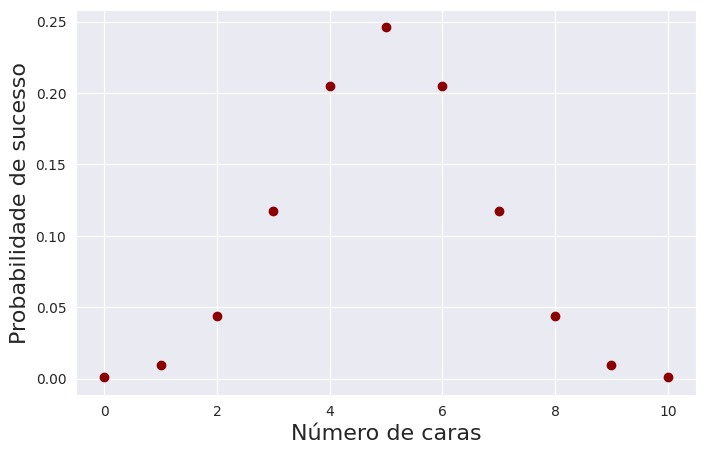

In [13]:
probabilities = []
for i in range(n+1):
  # N√∫mero de sucessos, x = i
  print('Probabilidade de {:3d} sucesso(s) no evento: {:.2%}'.format(i,Y.pmf(i)))
  probabilities.append([i,Y.pmf(i)])

prob = np.array(probabilities)

fig, ax = plt.subplots(figsize=(8,5))
plt.scatter(prob[:,0],prob[:,1], color = colors[1])
plt.xlabel("N√∫mero de caras",fontsize=16)
plt.ylabel("Probabilidade de sucesso",fontsize=16)
plt.show()

Lembre-se que:

\begin{align}
P(x;10,0.5) = \begin{pmatrix}
n \\
x
\end{pmatrix}
p^x (1-p)^{n-x} = \begin{pmatrix}
10 \\
x
\end{pmatrix}
0.5^x (1-0.5)^{10-x}
\end{align}
onde
\begin{align}
\begin{pmatrix}
10 \\
x
\end{pmatrix}=\frac{10!}{x!(10-x)!}
\end{align}

Vamos testar a resposta para n√∫mero de sucessos $x=6$:
\begin{align}
\begin{pmatrix}
10 \\
6
\end{pmatrix}=\frac{10!}{6!(10-6)!}=\frac{10\times 9 \times 8 \times 7 \times 6!}{6!4!}=\frac{10\times 9 \times 8 \times 7}{4\times 3 \times 2}=210
\end{align}

Portanto,
\begin{align}
P(6;10,0.5) = 210 \times 0.5^6 0.5^4 = 20.51\%
\end{align}


In [ ]:
p6 = 210*0.5**10
print(p6)

### Outro exemplo...
Suponha que numa popula√ß√£o, com muitos milh√µes de pessoas, $3\%$ delas sejam canhotas. Qual a probabilidade $p$ de encontramos $4$ ou mais canhotos dentre $120$ pessoas escolhidas ao acaso desta popula√ß√£o?

In [ ]:
# Vari√°veis de entrada:
#Identifique o sucesso: Canhoto
# Probabilidade de sucesso de cada experimento, p
p = 0.03
# N√∫mero de eventos independentes (repeti√ß√µes do experimento), n
n = 120
Y = binom(n,p)

In [ ]:
# N√∫mero de sucessos, x>=4
x_min = 4
prob = []
for i in range(x_min):
  # N√∫mero de sucessos, x = i
  print('Probabilidade de {:3d} sucesso(s) no evento: {:.3%}'.format(i,Y.pmf(i)))
  prob.append(Y.pmf(i))
prob_tot = sum(prob)

print('\n A probabilidade de encontramos  {:3d}  ou mais canhotos dentre 120  pessoas escolhidas \n  ao acaso desta popula√ß√£o √©: {:.3%}.'.format(x_min,1-prob_tot))


Veja abaixo, o c√°lculo da probabilidade de que sejam encontrados 3 canhotos dentre 120  pessoas escolhidas ao acaso desta popula√ß√£o.

\begin{align}
P(3;10,0.5) = \frac{10!}{3!(10-3)!} 0.03^3 (1-0.0.03)^{120-3}
\end{align}

In [ ]:
import math
x = 3
n = 120
p=0.03
p3=math.factorial(n)/(math.factorial(x)*math.factorial(n-x))*p**x*(1-p)**(n-x)
print('A probabilidade de encontramos  {:3d}  canhotos dentre 120  pessoas escolhidas \n  ao acaso desta popula√ß√£o √©: {:.3%}.'.format(x,p3))

In [ ]:
prob_tot = Y.cdf(x_min-1)
print('A probabilidade de encontramos  at√© {:3d}  canhotos : {:.2%}.'.format(x_min-1,prob_tot))
print('A probabilidade de encontramos  {:3d}  ou mais canhotos dentre 120  pessoas escolhidas \n  ao acaso desta popula√ß√£o √©: {:.2%}.'.format(x_min,1-prob_tot))

Vejam que o `CDF` calcula a probabilidade acumulada enquanto o `PMF` calcula a probabilidade de ocorr√™ncia de um √∫nico valor ocorrer.

In [ ]:
x = 12
a = np.array(list(map(lambda i: [i,Y.pmf(i),Y.cdf(i)], range(x))))

fig, ax = plt.subplots(figsize=(8,5))
plt.plot(a[:,0],a[:,1], color = colors[0], label = 'PMF')
plt.plot(a[:,0],a[:,2], color = colors[2], label = 'CDF')
plt.xlabel("N√∫mero de canhotos",fontsize=14)
plt.ylabel("Probabilidade de sucesso",fontsize=14)
plt.legend()
plt.show()

### Probabilidade e probabilidade acumulada

Retira-se uma amostra de 12 e-mails. Sabendo-se que 2% dos e-mails s√£o spams, qual √© a probabilidade de haver um √∫nico spam dentre os 12? Adicionalmente, qual a probabilidade de n√£o haver mais de um spam em toda amostra?

Duplo-clique __aqui__ para a solu√ß√£o.

<!-- Resposta abaixo:
n=12; p=0.02; x=1;
prob1 = binom.pmf(x, n, p)
print('Probabilidade de 1 sucesso no evento:','{:.2%}'.format(prob1))
#Posso somar as duas probabilidades, de P(0) e P(1), ou usar a
prob2 = binom.pmf(0, n, p) + binom.pmf(1, n, p)
# ou usar a op√ß√£o cdf (que refere-se √† acumulada)
prob2b = binom.cdf(x, n, p)
print('Probabilidade de n√£o mais que 1 sucesso no evento:','{:.2%}'.format(prob2), 'ou', '{:.2%}'.format(prob2b))
-->

A fun√ß√£o `ppf` (percentage per function) √© a inversa da `cdf` usada anteriormente.

In [ ]:
n=12; p=0.02; x=1;
prob3 = binom.ppf(0.99, n, p)
print('Significa que, com 99% de probabilidade, o n√∫mero de spams √© menor que ', prob3)
# Confira com os valores da fun√ß√£o cmd
for j in range(13):
    print('P de encontrar, no m√°ximo, %d spams em 12 e-mails testados: %.5f%%' %(j, binom.cdf(j,n,p)*100))

### Treine...
Uma empresa envia c√≥digo de desconto para 9 pessoas, cada uma com uma probabilidade estimada de sucesso de compra de 0,1. Nenhuma das 9 pessoas compra.
1. Qual √© a probabilidade disso acontecer?
2. Qual a probabilidade de, pelo menos, 2 pessoas comprarem?

Duplo-clique __aqui__ para a solu√ß√£o.

<!-- Resposta abaixo:
n=9; p=0.1; k=20000
prob1 = binom.pmf(0, 9, 0.1)
print('A probabilidade de nenhuma das 9 pessoas comprar √© de aproximadamente:', '{:.2%}'.format(prob1))
prob2 = 1.0 - binom.cdf(1,n,p)
print('A probabilidade de, pelo menos, 2 pessoas comprarem √© de:', '{:.2%}'.format(prob2))
-->

### Simula√ß√£o de dados com comportamento binomial

Veja que pode-se simular v√°rios experimentos binomiais.

In [ ]:
n=3
p=0.5
Z = binom(n,p)

In [ ]:
#size = k = n√∫mero de experimentos (eventos)
k=5;
# veja que voc√™ pode usar a op√ß√£o: success = binomial(n, p, size=k), que importamos no in√≠cio
success = Z.rvs(size=k)
print('Total de sucessos em cada evento:', success)
# Momentos: m√©dia e vari√¢ncia
mean, var = Z.stats(moments='mv')
print('M√©dia={:6.3f}, Vari√¢ncia={:6.3f}'.format(mean, var))

In [ ]:
# Vari√°veis de entrada:
# N√∫mero de tentativas, trials
trials = 10000
# N√∫mero de eventos independentes em cada tentativa, n
n = 10
# Probabilidade de sucesso de cada experimento, p
p = 0.5
Z = binom(n,p)
# Chama a fun√ß√£o
heads = Z.rvs(size = trials)
# Plotagem dos resultados
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(8,5))
ax = sns.histplot(heads, bins=np.linspace(0,10,11), label='resultado simulacao',color=colors[0])
ax.set_xlabel("N√∫mero de caras",fontsize=16)
ax.set_ylabel("Frequ√™ncia",fontsize=16);

In [ ]:
# Compara√ß√£o entre o resultado binomial e o teste rand√¥mico
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(8,5))
ax = sns.histplot(heads, bins=np.linspace(0,10,11)+0.5, kde = False, label='Resultado simula√ß√£o',color=colors[0])
ax.set_xlabel("N√∫mero de caras",fontsize=16)
ax.set_ylabel("Frequ√™ncia",fontsize=16)
x = range(0,11)
ax.plot(x, Z.pmf(x)*trials, 'ro', label='Distribui√ß√£o Binomial Real')
ax.vlines(x, 0, Z.pmf(x)*trials, colors='r', lw=5, alpha=0.5)
plt.legend()
plt.show()

In [ ]:
# Probabilidade de obter 6 caras randomicamente e binomial
#   representa a diferen√ßa entre o bloco roxo e a linha vermelha do gr√°fico acima em 'n√∫mero de coroas' = 6
n = 10; p = 0.5; k = 10000; x=6;
Z = binom(n,p)
prob_6 = sum([1 for i in Z.rvs(size=k) if i==6])/k
prob_6b = Z.pmf(x)
print('A probabilidade de obter {:2d} caras randomicamente em {:6d} eventos de {:4d} √©: {:2.6f}'.format(x,k,n,prob_6))
print('A probabilidade de obter {:2d} pelo modelo binomial √©: {:2.6f}'.format(x,prob_6b))

### Exemplo do vendedor
O exemplo √© adaptado de [Binomial](https://towardsdatascience.com/fun-with-the-binomial-distribution-96a5ecabf65b)

*   Um vendedor que atende via call center recebe em m√©dia 50 liga√ß√µes por dia.
*   A probabilidade de uma convers√£o (venda) para cada chamada √© de 4%.
*   A receita m√©dia para a empresa em cada convers√£o √© de R\$50.
*   O call center que voc√™ est√° analisando possui 150 vendedores.
*   Cada vendedor custa R\$100 por dia de trabalho.

Analise o lucro da empresa. E, nesse caso, o que seria mais eficiente, aumentar o n√∫mero de funcion√°rios de 150 para 200 ou aumentar a taxa de convers√£o de 4% para 5%?

In [ ]:
def metricas_vendedores(conversoes, receita, salario, vendedores):
    metricas = []
    metricas.append(np.mean(conversoes))
    metricas.append(np.std(conversoes))
    metricas.append(np.sum(conversoes))
    metricas.append(np.sum(conversoes)*receita)
    metricas.append(vendedores*salario)
    metricas.append(np.sum(conversoes)*receita - vendedores*salario)
    print('M√©dia de convers√µes por vendedor: {:4.2f}'.format(metricas[0]))
    print('Desvio padr√£o de convers√µes por vendedor: {:4.2f}'.format(metricas[1]))
    print('Total de convers√µes: {:6.0f}'.format(metricas[2]))
    print('Total de receita: {:6.0f}'.format(metricas[3]))
    print('Total de despesas: {:6.0f}'.format(metricas[4]))
    print('Lucro Total: {:6.0f}'.format(metricas[5]))
    return metricas

In [ ]:
# N√∫mero de vendedores
vendedores = 150
# Custo por empregado
salario = 100
# N√∫mero de liga√ß√µes independentes por vendedor
n = 50
# Probabilidade de sucesso de cada liga√ß√£o (taxa de convers√£o)
p = 0.04
# Receita m√©dia para companhia por chamada
receita = 50
# Modelo binomial para os vendedores
conversoes = binomial(n, p, size=vendedores)
# Algumas m√©tricas importantes do call center modelado
metricas = metricas_vendedores(conversoes, receita, salario, vendedores)
mean, var = binom.stats(n, p, moments='mv')
print('Para o modelo binomial, m√©dia= {:6.3f}, desvio= {:6.3f}'.format(mean, np.sqrt(var)))


Veja que o n√∫mero de convers√µes di√°rias de cada vendedor √© uma fun√ß√£o binomial, com $n=50$ (n√∫mero de liga√ß√µes por vendedor) e $p=0.04$ (probabilidade de sucesso). Comoe xistem 150 vendedres, teremos $size = 150$, ie, teremos 150 eventos binomiais.

In [ ]:
print(conversoes.shape, sum(conversoes))
conversoes

In [ ]:
# Plotagem dos resultados
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(14,7))
w=1
ax = sns.histplot(conversoes, bins=np.arange(min(conversoes),max(conversoes)+2*w,w), label='Resultado das simula√ß√µes',color=colors[0])

ax.set_xlabel("Convers√µes di√°rias",fontsize=16)
ax.set_ylabel("Frequencia",fontsize=16);

Veja que o modelo binomial considerando $n \times size$ temos somente uma resposta. Emt ermos de m√©dia de sucesso, obteremos valores similares, mas perderemos a ideia de como se comporta o modelo da distribui√ß√£o de sucessos entre os vendedores.

In [ ]:
conversoes2 = binomial(n*vendedores, p)
print(conversoes2)

Para avaliar os lucros, vamos olhar para uma janela de 1000 dias.

In [ ]:
# Simula√ß√£o de 1000 dias diferentes de trabalho
# N√∫mero de dias para simular
sims = 1000
vendedores = 150; salario = 100; n = 50; p = 0.04; receita = 50;
# sim_conversoes simula o modelo binomial que apresentamos para um dia 1000 vezes.
sim_conversoes = [binomial(n*vendedores, p) for i in range(sims)]
# O c√≥digo acima √© similar √† express√£o: sim_conversoes = [np.sum(binomial(n, p, size=vendedores)) for i in range(sims)]
sim_lucro = np.array(sim_conversoes)*receita - vendedores*salario

# Plotagem dos resultados
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(14,7))
ax = sns.histplot(sim_lucro, bins=20, kde = False, label='Resultado das simula√ß√µes',color=colors[0])

ax.set_xlabel("Lucro",fontsize=16)
ax.set_ylabel("Frequencia",fontsize=16)

plt.savefig(fname='Vendedores_Hist', dpi=150)

In [ ]:
# Adicione 1 se lucro do dia √© < 0
prej = sum([1 for i in sim_lucro if i<0])
print('Dentre os {:5d} dias analisados, a empresa teve preju√≠zo em {:5d} dias.'.format(sims,prej))

In [ ]:
# Primeira op√ß√£o: Aumentando a taxa de sucesso
# N√∫mero de vendedores
vendedores = 150
# Custo por empregado
salario = 100
# N√∫mero de liga√ß√µes independentes por empregado
n = 50
# Probabilidade de sucesso de cada liga√ß√£o (taxa de convers√£o)
p = 0.05
# Receita m√©dia para companhia por chamada
receita = 50
# Modelo binomial para os vendedores
conversoes_taxa = binomial(n, p, size=vendedores)
# Algumas m√©tricas importantes do call center modelado
metricas = metricas_vendedores(conversoes_taxa, receita, salario, vendedores)
mean, var = binom.stats(n, p, moments='mv')
# Compare os valores da m√©dia e desvio padr√£o do modelo com m√©dia e desvio padr√£o da resposta rand√¥mica calculados acima
print('Para o modelo binomial, m√©dia=%.3f, desvio=%.3f' % (mean, np.sqrt(var)))
####################
####################
# Simula√ß√£o de 1000 dias de trabalho
# N√∫mero de dias para simular
sims = 1000

sim_conversoes_taxa = [binomial(n*vendedores, p) for i in range(sims)]
sim_lucro_taxa = np.array(sim_conversoes_taxa)*receita - vendedores*salario

# Plotagem dos resultados
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(14,7))
ax = sns.histplot(sim_lucro, bins=20, kde = False, label='Simula√ß√£o original', color=colors[0])
ax = sns.histplot(sim_lucro_taxa, bins=20, kde = False, label='Simula√ß√£o com aumento de taxa', color=colors[2])

ax.set_xlabel("Lucro",fontsize=16)
ax.set_ylabel("Frequencia",fontsize=16)
plt.legend()

plt.savefig(fname='Vendedores_Hist_2', dpi=150)

Agora modifique o n√∫mero de funcion√°rios e tire suas conclus√µes.

Duplo-clique __aqui__ para solu√ß√£o final.

<!-- Resposta abaixo:
# Segunda op√ß√£o: Aumentando de vendedores para 200
# N√∫mero de vendedores
vendedores = 200
# Custo por empregado
salario = 100
# N√∫mero de liga√ß√µes independentes por empregado
n = 50
# Probabilidade de sucesso de cada liga√ß√£o (taxa de convers√£o)
p = 0.04
# Receita m√©dia para companhia por chamada
receita = 50
# Modelo binomial para os vendedores
conversoes_vend = np.random.binomial(n, p, size=vendedores)
# Algumas m√©tricas importantes do call center modelado
metricas = metricas_vendedores(conversoes_vend, receita, salario, vendedores)
mean, var = binom.stats(n, p, moments='mv')
print('Para o modelo binomial, m√©dia=%.3f, desvio=%.3f' % (mean, np.sqrt(var)))
###############################
# Simula√ß√£o de 1000 dias de trabalho
# N√∫mero de dias para simular
sims = 1000

sim_conversoes_vend = [binomial(n*vendedores, p) for i in range(sims)]
sim_lucro_vend = np.array(sim_conversoes_vend)*receita - vendedores*salario

# Plotagem dos resultados
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(14,7))
ax = sns.histplot(sim_lucro, bins=20, kde = False, label='Simula√ß√£o original',color=colors[0])
ax = sns.histplot(sim_lucro_taxa, bins=20, kde = False, label='Simula√ß√£o com aumento de taxa', color=colors[2])
ax = sns.histplot(sim_lucro_vend, bins=20, kde = False, label='Simula√ß√£o com aumento de vendedores', color=colors[3])

ax.set_xlabel("Lucro",fontsize=16)
ax.set_ylabel("Frequencia",fontsize=16)
plt.legend()

plt.savefig(fname='Call_Center_Hist_2', dpi=150)
-->

## Distribui√ß√£o multinomial

Distribui√ß√£o multinomial √© uma generaliza√ß√£o da distribui√ß√£o binomial para $k$ categorias e $n$ tentativas.  Quando $k=2$ e $n=1$, a distribui√ß√£o multinomial √© a distribui√ß√£o de Bernoulli. Quando $k=2$ e $n>1$, √© a distribui√ß√£o binomial.

In [ ]:
print('Solu√ß√£o por multinomial:', multinom.pmf([3, 4], n=7, p=[0.4, 0.6]))
print('Solu√ß√£o por binomial:',binom.pmf(3, 7, 0.4))

Suponha que, em uma elei√ß√£o, de um grande pa√≠s, com tr√™s candidatos, o candidato ùê¥ receba 20% dos votos, o candidato ùêµ receba 30% dos votos e o candidato ùê∂ receba 50% dos votos. Se seis eleitores forem selecionados aleatoriamente, qual √© a probabilidade de haver exatamente um partid√°rio do candidato ùê¥, dois partid√°rios do candidato ùêµ e tr√™s partid√°rios do candidato ùê∂ na amostra?

In [ ]:
print('Solu√ß√£o por multinomial:','{:.2%}'.format(multinom.pmf([1,2,3], n=6, p=[0.2,0.3, 0.5])))

Sup√µe-se, agora, que 1000 pessoas s√£o entrevistadas. Quantas, provavelmente, votar√£o em cada candidato?

In [ ]:
p = [0.2, 0.3, 0.5]
k = 1000
# Rodar a simula√ßao
cases = multinom.rvs(k, p)
# summarize cases
for i in range(len(cases)):
	print('Candidato %d: %d' % (i+1, cases[i]))

Em um torneio de xadrez, queremos determinar qual √© a probabilidade de, ap√≥s 12 jogos, o jogador 1 ter 7 vit√≥rias, o jogador 2 ter 2 vit√≥rias e os jogos restantes terminarem empatados. Para isso, suponha que a probabilidade do Jogador 1 vencer seja 40%, o Jogador 2 seja 35% e o empate tenha probabilidade 25%. Portanto temos,



In [ ]:
print('Probabilidade final:', multinom.pmf([7,2,3], n=12, p=[0.4, 0.35,0.25]))

O gr√°fico abaixo mostra que, com o aumento do n√∫mero de partidas jogadas, a probabilidade converge ao valor te√≥rico p(x=K) = 0,0248.

In [ ]:
n = 12                      # n√∫mero de partidas
pvals = [0.4, 0.35, 0.25]   # probabilidades em uma √∫nica partida

# n√∫mero de partidas jogadas
sizes =[]
# uma lista para conter propor√ß√µes (devem ser convergentes para pvals)
# em que o jogador 1 vence 7 vezes, o jogador 2 vence 2 vezes e ocorrem 3 empates:
p = []

for size in np.logspace(2,4):
    # vari√°veis aleat√≥rias discretas s√£o geradas de acordo com a distribui√ß√£o multinomial:
    outcomes = np.random.multinomial(n, pvals, size=int(size))

    # vamos contar a propor√ß√£o do resultado esperado sobre todos os resultados
    # dever√° convergir para a probabilidade
    prob = sum((outcomes[:,0]==7)&(outcomes[:,1]==2)&(outcomes[:,2]==3))/len(outcomes)

    p.append(prob)
    sizes.append(int(size))

# Gr√°fico
fig1 = plt.figure()
plt.plot(sizes,p,'o-')
plt.plot(sizes,[0.0248]*len(sizes),'--r')
plt.grid()
plt.xlim(xmin=0)
plt.xlabel('N√∫mero de partidas')
plt.ylabel('p(X=K)')
plt.title('Te√≥rico p(X=K) = 0.0248');

## Distribui√ß√£o geom√©trica

Realizamos uma s√©rie de ensaios de Bernoulli at√© obtermos sucesso. Temos $x$ falhas antes do sucesso.

A distribui√ß√£o geom√©trica √© parametrizada por um √∫nico valor, $p$, a probabilidade de o julgamento de Bernoulli ser bem-sucedido.

Fun√ß√£o de massa de probabilidade:

\begin{align}
P(x;p) = (1-p)^x p.
\end{align}

Nos esportes, √© comum os jogadores fazerem v√°rias tentativas de marcar pontos. Cada tentativa √∫nica pode ter dois resultados poss√≠veis: pontua√ß√£o ou n√£o pontua√ß√£o. Essas situa√ß√µes podem ser modeladas com distribui√ß√µes geom√©tricas. Qual a probabilidade de um jogador de basquete acertar uma cesta de 3 pontos na terceira tentativa, dado que a probabilidade de sucesso √© de 30%?
Mostre a curva de probabilidade por n√∫mero de fracassos.

In [ ]:
# Probabilidade de sucesso, p; e n√∫mero de tentativas at√© o sucesso, k
p=0.4
k=3
print('A chance de acertar na terceira tentativa √©: ','{:.2%}'.format(geom.pmf(k,p)))
mean, var = geom.stats(p, moments='mv')
print('M√©dia=%.3f, Vari√¢ncia=%.3f' % (mean, var))

In [ ]:
# Cria√ß√£o da amostra
p=0.3
trials = 1000
sample = geom.rvs(p, size=trials)
# Plotagem dos resultados
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(14,7))
ax = sns.distplot(sample, bins = np.linspace(0,15,16)+0.5, kde=False, label='Distribui√ß√£o Rand√¥mica',color=colors[0])
k = range(1,15)
ax.plot(k, geom.pmf(k, p)*trials, 'ro', label='Distribui√ß√£o Geom√©trica Real')
print(geom.pmf(k, p))
ax.vlines(k, 0, geom.pmf(k, p)*trials, colors='r', lw=5, alpha=0.5)
plt.legend()
plt.xlim(1,15)
ax.set_xlabel("Tentativas at√© o sucesso",fontsize=16)
ax.set_ylabel("Frequencia",fontsize=16)
plt.savefig(fname='Basquete_Hist', dpi=150)

## Distribui√ß√£o de Poisson

Eventos raros ocorrem com uma taxa $\lambda$ por unidade de tempo. N√£o h√° *mem√≥ria* de eventos anteriores; ou seja, essa taxa √© independente do tempo. Um processo que gera esses eventos √© chamado de processo de Poisson. A ocorr√™ncia de um evento raro nesse contexto √© chamada de chegada. O n√∫mero $x$ de chegadas em tempo unit√°rio √© distribu√≠do por Poisson.

O par√¢metro √∫nico √© a taxa $\lambda$ dos eventos raros que ocorrem.

A fun√ß√£o de massa de probabilidade √© dada por,
\begin{align}
P(x;\lambda) = \frac{\lambda^x}{x!}\,\mathrm{e}^{-\lambda}.
\end{align}

Um telefone recebe em m√©dia 0,25 chamadas por hora. Qual a probabilidade de, em 4 horas, receber:
*   No m√°ximo 2 chamadas?
*   Exatamente tr√™s chamadas?
*   No m√≠nimo 3 chamadas?

In [ ]:
lamb_value=0.25
tot=4
mu=lamb_value*tot
iterable = (poisson.pmf(i, mu) for i in range(0,3))
values = np.fromiter(iterable, float) #The fromiter() function of Python numpy class creates a ndarray by using an iterable object. It returns a one-dimensional ndarray object
print(values)
aux = np.sum(values)
#Pode-se usar a acumulada cdf
aux2 = poisson.cdf(2, mu)
print('A probabilidade de receber, no m√°ximo, 2 chamadas, √©: ','{:.2%}'.format(aux),'ou','{:.2%}'.format(aux2))

In [ ]:
x = 3
print('A probabilidade de receber 3 chamadas, √©: ','{:.2%}'.format(poisson.pmf(x,mu)))
print('A probabilidade de receber no m√≠nimo 3 chamadas, √©: ','{:.2%}'.format(1-aux)) #lembre-se que 'aux' (ou 'aux2') √© o valor acumulado P(0)+P(1)+P(2)

No exemplo abaixo,  para uma frequ√™ncia $\lambda = 2.5$ e um intervalo $t=4$, s√£o testadas `trials = 10000` amostras.  Verifique que a maior frequ√™ncia √© de  `10`, isto √©, $\lambda t$.

In [ ]:
# Distribui√ß√£o rand√¥mica
lamb_value=2.5 #troque os valores de lambda e verifique a forma da curva
tot=4
mu=lamb_value*tot
trials = 10000
sample_poisson = poisson.rvs(mu, size=trials)
# Plotagem dos resultados
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(14,7))
ax = sns.histplot(sample_poisson, bins = np.linspace(0,26,27)+0.5, kde=False, label='Distribui√ß√£o Rand√¥mica',color=colors[0])
k = range(0,25)
ax.plot(k, poisson.pmf(k, mu)*trials, 'ro', label='Distribui√ß√£o Geom√©trica Real')
print(poisson.pmf(k, mu))
ax.vlines(k, 0, poisson.pmf(k,mu)*trials, colors='r', lw=5, alpha=0.5)
plt.legend()
plt.xlim(0,25)
ax.set_xlabel("Tentativas",fontsize=16)
ax.set_ylabel("Frequencia",fontsize=16)
plt.savefig(fname='Basquete_Hist', dpi=150)

# Verossimilhan√ßa (Likekihood)

Um dos conceitos mais fundamentais para Machine Learning √© o de verossimilhan√ßa. Em cada uma das vari√°veis ‚Äã‚Äãaleat√≥rias discretas que consideramos at√© agora, a distribui√ß√£o depende de um ou mais par√¢metros que s√£o, na maioria das aplica√ß√µes, desconhecidos. Na distribui√ß√£o Binomial, o par√¢metro √© $p$, j√° que $n$ √© normalmente fixo e conhecido.

A fun√ß√£o de verossimilhan√ßa √© essencialmente a distribui√ß√£o de uma vari√°vel aleat√≥ria (ou distribui√ß√£o conjunta de todos os valores se for obtida uma amostra da vari√°vel aleat√≥ria) vista como uma fun√ß√£o do(s) par√¢metro(s). A raz√£o para visualiz√°-lo dessa maneira √© que os valores dos dados ser√£o observados e podem ser substitu√≠dos, e o valor do par√¢metro desconhecido que maximiza essa fun√ß√£o de verossimilhan√ßa pode ser encontrado. A intui√ß√£o √© que esse valor maximizador √© o que torna nossos dados observados mais prov√°veis.

Vamos resumir a diferen√ßa entre *probabilidade* e *verossimilhan√ßa* da seguinte forma: a *probabilidade* quantifica a antecipa√ß√£o (do resultado), a *verossimilhan√ßa* quantifica a confian√ßa (no modelo).

Suponha que algu√©m nos desafia para um 'jogo de apostas lucrativo'. Ent√£o, as probabilidades nos servir√£o para calcular valores como o perfil esperado de seus ganhos e perdas (m√©dia, moda, mediana, vari√¢ncia, raz√£o de informa√ß√£o, valor em risco, ru√≠na dos jogadores e assim por diante). Em contraste, a verossimilhan√ßa nos servir√° para quantificar se confiamos nessas probabilidades'.

Para modelo Binomial,
\begin{align*}
L(p|n,x) &= \left(\frac{n!}{x!\left( n-x\right)!}\right) p^{x}(1-p)^{(n-x)}\\
\ell(p|n,x) &= \sum_{i=1}^n x \log{p} + \sum_{i=1}^n (1-x)\log{(1-p)}
\end{align*}

Dessa forma, a primeira derivada da verossimilhan√ßa logar√≠tmica (tamb√©m chamada de *score function*) igualada a zero fornece o $p$ relacionado √† m√°xima verossimilhan√ßa, ou MLE (do ingl√™s, Maximum Likelihood Estimation).

\begin{align*}
\dfrac{\partial\ell(p|n,x)}{\partial p} &=\frac{\partial\left(\frac{n!}{x!\left( n-x\right)!}\right)}{\partial p}+  \frac{\partial x \log{p}}{\partial p} +\frac{ (n-x)\log{(1-p)}} {\partial p}\overset{\text{def}}{=}0\\
\dfrac{\partial\ell(p|n,x)}{\partial p} &= \dfrac{x}{p} - \dfrac{(n-x)}{1-p} \overset{\text{def}}{=}0\\
\end{align*}
Portanto,
\begin{align*}
x - px +xp-np &= 0\\
p& = \dfrac{x}{n}
\end{align*}

Veja a similaridade da resposta, considerando $n$ eventos independentes de Bernoulli, cada um podendo ocorrer $x=0$ (fracasso) ou $x=1$ (sucesso), dada a probabilidade $p$ de sucesso.

\begin{equation}
L(p) = \prod_{i=1}^np^{x_i}(1-p)^{1-x_i}
\end{equation}

Portanto,
\begin{align*}
\ell(p) &= \log{p}\sum_{i=1}^n x_i + \log{(1-p)}\sum_{i=1}^n (1-x_i)\\
\dfrac{\partial\ell(p)}{\partial p} &= \dfrac{\sum_{i=1}^n x_i}{p} - \dfrac{\sum_{i=1}^n (1-x_i)}{1-p} \overset{\text{def}}{=}0
\end{align*}

Da√≠ segue que,
\begin{align*}
\sum_{i=1}^n x_i - p\sum_{i=1}^n x_i &= p\sum_{i=1}^n (1-x_i)\\
p& = \dfrac{1}{n}\sum_{i=1}^n x_i
\end{align*}




### Coca zero ou normal?

As pessoas gostam mais de coca zero ou coca normal?

Supondo que voc√™ testou e descobriu que de 7, quatro escolhem coca zero. Plote o gr√°fico de verossimilhan√ßa e ache o MLE.


![Coca](https://drive.google.com/uc?export=view&id=11MkuyJX18Sauz58D0nliUO96JPwz0wU3)




In [ ]:
n,x = 7,4
p = np.linspace(0.0,1.0,50)
likelihood = []
# veja que voc√™ pode usar a op√ß√£o: success = binomial(n, p, size=k), que importamos no in√≠cio
for i in p:
  likelihood.append([i,binom.pmf(x,n,i)])

prob = np.array(likelihood)

fig, ax = plt.subplots(figsize=(8,5))
plt.scatter(prob[:,0],prob[:,1], color = colors[0])
plt.scatter(0.4,binom.pmf(x,n,0.4), s = 70, color = colors[1])
plt.scatter(0.57,binom.pmf(x,n,0.57), s = 70, color = colors[1])
plt.scatter(0.8,binom.pmf(x,n,0.8), s = 70, color = colors[1])
print(binom.pmf(x,n,0.4))
plt.xlabel(r"$p$",fontsize=16)
plt.ylabel(r"$L(p|n,x)$",fontsize=16)
plt.show()

In [ ]:
n,x = 7,4
p = np.linspace(0.0,1.0,50)
likelihood = []
# veja que voc√™ pode usar a op√ß√£o: success = binomial(n, p, size=k), que importamos no in√≠cio
for i in p:
  likelihood.append([i,np.log(binom.pmf(x,n,i))])

prob = np.array(likelihood)

fig, ax = plt.subplots(figsize=(8,5))
plt.scatter(prob[:,0],prob[:,1], color = colors[0])

plt.scatter(0.57,np.log(binom.pmf(x,n,0.57)), s = 70, color = colors[1])

print(binom.pmf(x,n,0.4))
plt.xlabel(r"$p$",fontsize=16)
plt.ylabel(r"$\log[L(p|n,x)]$",fontsize=16)
plt.show()

## Lan√ßamento de moeda

![Moeda](https://drive.google.com/uc?export=view&id=14riVSCXXNxPOxOWgre1_lT0pA-QGNIAk)

Vamos fazer uma an√°lise Bayesiana simples de um lan√ßamento de moeda.

Para os prop√≥sitos do experimento, suponha que voc√™ esteja jantando com seus amigos e um deles sugere um jogo - ele jogar√° uma moeda 20 vezes, por 3 vezes,  e a pessoa que prever o n√∫mero de caras com mais precis√£o, em qualquer uma das jogadas, vence.

O que queremos analisar, portanto, √© a probabilidade de cara da moeda. Em outras palavras, queremos analisar se a moeda √© equilibrada ou se h√° um vi√©s na probabilidade de caras. Nosso par√¢metro $\theta$, portanto, √© a probabilidade de cara da moeda.

Vamos gerar nossa metodologia Bayesiana.
O teorema de Bayes diz que precisamos pensar tanto em nossa distribui√ß√£o amostral quanto em nossa distribui√ß√£o a priori $p(\theta)$. Podemos partir de duas ideias para nossa probabilidade a priori:

1.  Conhecendo seu amigo, voc√™ suspeita que a moeda n√£o √© equilibrada. Por√©m, n√£o tem uma boa raz√£o para suspeitar que ela √© mais desiquilibrada para cara em vez de coroa. Seu conhecimento pr√©vio do par√¢metro $p$ √©, portanto, uma distribui√ß√£o uniforme ‚Äî de sua perspectiva, cada um dos valores de par√¢metro √© igualmente prov√°vel. N√£o se tem nenhuma ideia sobre isso, e considera-se uma distribui√ß√£o igual para qualquer valor de $\theta$ entre zero e 1.
2. Voc√™ decide usar a experi√™ncia passada em observa√ß√µes de moedas e, portanto, espera que a probabilidade de observar caras seja 0.5.

### Distribui√ß√µes a priori

Se voc√™ vai partir do princ√≠pio que seu amigo est√° com uma moeda desiquilibrada, sua distribui√ß√£o a priori ser√° dada por,

In [ ]:
# Valores entre 0-1 que varrem todo espa√ßo de valores que o par√¢metro theta pode assumir
param = np.linspace(0,1,1000)
theta_prior = np.array([1]*len(param))

#Plotando a distribui√ß√£o a priori
fig, ax = plt.subplots(figsize=(10, 4))

plt.plot(param, theta_prior, color='navy')
ax.set(title='Distribui√ß√£o probabilidade a priori', xlabel=r'$\theta$',
       ylabel=r'$p(\theta)$')
plt.show()

Se voc√™ vai partir do pressuposto de que a moeda √© honesta, sua distribui√ß√£o √† priori pode ser dada pela simula√ß√£o de um comportamento esperado com $p=0.5$, como `moeda_prior` definida abaixo. Uma t√©cnica seria, quanto mais seguro voc√™ estiver, a priori, de que a moeda √© honesta, maior √© o n√∫mero de lan√ßamentos que voc√™ ir√° simular.

In [ ]:
moeda_prior = [0]*2+[1]*2
print(moeda_prior)

In [ ]:
param = linspace(0,1,10)
theta_prior = np.array([np.prod(bernoulli.pmf(moeda_prior, p)) for p in param])
print(theta_prior)

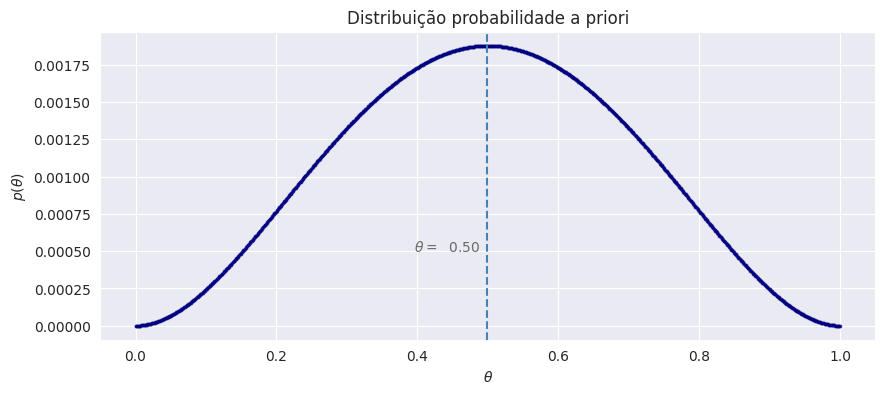

In [ ]:
param = linspace(0,1,1000)
#A distribui√ß√£o de probabilidade a priori ser√° a probabilidade de encontrarmos os valores
#que definimos como moeda_prior para cada valor v√°lido do par√¢metro, que definimos em param
theta_prior = np.array([np.prod(bernoulli.pmf(moeda_prior, p)) for p in param])
# Normalizamos o valor, dado que n√£o nos preocuparemos com p(E)
theta_prior = theta_prior/np.sum(theta_prior)
theta_initial = theta_prior

MLE_index = np.argmax(theta_prior)
MLE = param[MLE_index]

fig, ax = plt.subplots(figsize=(10, 4))
style = dict(size=10, color='dimgrey')

plt.scatter(param, theta_prior, s = 3, alpha = 0.6, color='navy')
plt.axvline(x=MLE, color='steelblue', linestyle='--')
ax.text(MLE-0.01, 0.0005, r'$\theta=$'+ '{:6.2f}'.format(MLE), ha='right', **style)
# Label the axes
ax.set(title='Distribui√ß√£o probabilidade a priori', xlabel=r'$\theta$',
       ylabel=r'$p(\theta)$')
plt.show();

Precisamos simular os dados, ie, o lan√ßamento da moeda 20 vezes, feito por nosso amigo. Supomos que nossa moeda √© viesada, e d√° cara $77\%$ das vezes. __Veja que o valor real  $\theta=0.77$ √© o valor que n√£o temos e estamos procurando__. Estamos usando aqui para simularmos a cria√ß√£o da distribui√ß√£o de amostragem.

In [ ]:
moeda_obs = binom.rvs(n=1, p=0.77, size = 20)
moeda_obs[:10]

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1])

Veja que, se sua cren√ßa √© que a moeda √© equilibrada, seu primeiro chute deveria ser: 10 caras...

In [ ]:
#Valor esperado
print('Seu primeiro chute deveria ser:{:4d} caras'.format(int(MLE*20)))
print('O n√∫mero de caras do segundo lan√ßamento foi:{:4d} caras'.format(sum(moeda_obs)))

Seu primeiro chute deveria ser:   9 caras
O n√∫mero de caras do segundo lan√ßamento foi:  17 caras


Agora, voc√™ tem o resultado das 20 primeiras jogadas. Pe√ßa um tempo para seu amigo, e use Bayes para atualizar suas cren√ßas.

In [ ]:
# Verossimilhan√ßa
theta_obs = np.array([np.prod(bernoulli.pmf(moeda_obs, p)) for p in param])
theta_obs = theta_obs/np.sum(theta_obs)

fig, ax = plt.subplots(figsize=(10, 4))
style = dict(size=10, color='dimgrey')

MLE_index = np.argmax(theta_obs)
MLE = param[MLE_index]

aux = np.mean(moeda_obs)
plt.plot(param, theta_obs, color='navy')
plt.axvline(x=MLE, color='steelblue', linestyle='--')
ax.text(MLE-0.01, 0.0005, r'$\theta=$'+ '{:6.2f}'.format(MLE), ha='right', **style)
# Label the axes
ax.set(title='Distribui√ß√£o da amostra', xlabel=r'$\theta$', ylabel=r'$p(\theta)$')
plt.show()

Embora as observa√ß√µes de nossa distribui√ß√£o amostral indiquem uma probabilidade mais perto de $0.77$, temos uma cren√ßa inicial de que nosso par√¢metro √© $\theta = 0.5$. A nossa distribui√ß√£o posterior levar√° em conta nossa observa√ß√£o e nossas cren√ßas, de modo que:
$$
p(H|E) \propto p(E|H) * p(H)\ OU \ Posterior\ \propto Verossimilhan√ßa\ *  Prior
$$

In [ ]:
theta_posterior = [theta_prior[i] * theta_obs[i] for i in range(len(theta_prior))]
theta_posterior = theta_posterior/np.sum(theta_posterior)

MLE_index = np.argmax(theta_posterior)
MLE = param[MLE_index]

fig, ax = plt.subplots(figsize=(10, 4))
style = dict(size=10, color='dimgrey')

plt.plot(param, theta_posterior, color = 'rebeccapurple',label='Posterior')
plt.plot(param, theta_prior, color='navy',label='Prior')
# Label the axes
plt.axvline(x=MLE, color='mediumpurple', linestyle='--')
ax.set(title='Prior e Posterior', xlabel=r'$\theta$',
       ylabel=r'$p(\theta)$')
ax.text(MLE-0.01, 0.0005, r'$\theta=$'+ '{:04.2f}'.format(MLE), ha='right', **style)
plt.legend()
plt.show()


Andamos muito pouco para estarmos convencidos de que nossa  moeda n√£o √© equilibrada.

O caminho agora √© considerar a distribui√ß√£o a posterior como prior...

In [ ]:
theta_prior = theta_posterior

... E depois, pedirmos ao nosso amigo para lan√ßar a moeda $n=20$ vezes novamente.

In [ ]:
# Verossimilhan√ßa
moeda_obs = np.random.binomial(n=1, p=0.77, size = 20)
print(moeda_obs)
theta_obs = np.array([np.prod(bernoulli.pmf(moeda_obs, theta)) for theta in param])
theta_obs = theta_obs/np.sum(theta_obs)

In [ ]:
#Veja qual deveria ter sido seu chute antes desse segundo lan√ßamento e qual o n√∫mero de caras que saiu
print('Seu segundo chute deveria ser:{:4d}'.format(int(MLE*20)))
print('O n√∫mero de caras do segundo lan√ßamento foi:{:4d}'.format(sum(moeda_obs)))

In [ ]:
theta_posterior = [theta_prior[i] * theta_obs[i] for i in range(len(theta_prior))]
theta_posterior = theta_posterior/np.sum(theta_posterior)

fig, ax = plt.subplots(figsize=(10, 4))
style = dict(size=10, color='dimgrey')

MLE_index = np.argmax(theta_posterior)
MLE = param[MLE_index]

plt.plot(param, theta_posterior, color = 'rebeccapurple',label='Posterior')
plt.plot(param, theta_prior, color='slateblue',label='Prior')
plt.plot(param, theta_initial, color='navy',label='Inicial')
plt.axvline(x=MLE, color='mediumpurple', linestyle='--')
ax.text(MLE-0.01, 0.0005, r'$\theta=$'+ '{:04.2f}'.format(MLE), ha='right', **style)
ax.set(title='Prior e Posterior', xlabel=r'$\theta$',
       ylabel=r'$p(\theta)$')
plt.legend()
plt.show()

Percebeu que, a cada 20 lan√ßamentos, seu *chute* ser√° mais direcionado?

### <font color=green > Fa√ßa voc√™...
<font color=green > No Moodle, ser√° definida uma cren√ßa inicial e o valor valor $p$ de probabilidade de n√∫mero de caras da moeda que seu amigo ir√° jogar.
Quanto √† cren√ßa inicial, ser√£o definidos dois dados:
1. se a moeda √© honesta, √© viesada para maior n√∫mero de caras, ou √© viesada para maior n√∫mero de coroas;
2. se a sua cren√ßa ser√° forte ou fraca.

<font color=green > Com esses dados, escreva um texto que deve ser ilustrado por, no m√≠nimo, 3 gr√°ficos. O texto deve conter a defini√ß√£o, com justificativa, de quais seriam seus 3 "chutes": inicial, e depois de cada vez que seu amigo joga 20x a moeda. Escreva tamb√©m as suas conclus√µes a respeito do desempenho de seus resultados. Os 3 gr√°ficos sugeridos s√£o:
1. cren√ßa inicial;
2. sua cren√ßa atualizada ap√≥s a primeira vez que seu amigo joga a moeda 20x,
3. sua cren√ßa atualizada ap√≥s a segunda vez que seu amigo joga a moeda 20x.